In [1]:
import pandas as pd 
from matplotlib import pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'

In [4]:
infy = pd.read_csv('C:/Users/HP/Desktop/Insider Trading Proj/Infosys_2021.csv')
yes = pd.read_csv('C:/Users/HP/Desktop/Insider Trading Proj/Yes_2021.csv')


In [5]:
#remove unnecessary columns 
#keep date, open_price, close_price, TTQ

infy = infy.drop(columns = ['Symbol', 'Series','Prev Close', 'High Price','Low Price', 'Last Price', 'VWAP',
	'Turnover', 'No. of', 'Deliverable', '% Dly Qt to'])


yes = yes.drop(columns = ['Symbol', 'Series', 'Prev Close', 'High Price',
       'Low Price', 'Last Price', '% change during the day',
       'VWAP', 'Turnover', 'No. of', 'Deliverable',
       '% Dly Qt to'])

In [6]:
#change dtypes 
infy['Close Price'] = infy['Close Price'].str.replace(',','')
infy['Close Price'] = pd.to_numeric(infy['Close Price'])

infy['Open Price'] = infy['Open Price'].str.replace(',','')
infy['Open Price'] = pd.to_numeric(infy['Open Price'])

infy['Total Traded Quantity'] = infy['Total Traded Quantity'].str.replace(',','')
infy['Total Traded Quantity'] = pd.to_numeric(infy['Total Traded Quantity'])

yes['Total Traded Quantity'] = yes['Total Traded Quantity'].str.replace(',','')
yes['Total Traded Quantity'] = pd.to_numeric(yes['Total Traded Quantity'])


In [7]:
#add column '%change in share price' = (close - open)/open * 100
yes['Change in share price (%)'] = ((yes['Close Price'] - yes['Open Price'])/yes['Open Price']) *100
infy['Change in share price (%)'] = ((infy['Close Price'] - infy['Open Price'])/infy['Open Price']) *100

In [8]:
#find mean TTQ
TTQavg_yes = yes['Total Traded Quantity'].mean()
TTQavg_infy = infy['Total Traded Quantity'].mean()

In [9]:
#add column '%deviation in TTQ from mean' = (TTQ-avg)/avg * 100
yes['TTQ dev from mean (%)'] = ((yes['Total Traded Quantity']-TTQavg_yes)/TTQavg_yes) * 100
infy['TTQ dev from mean (%)'] = ((infy['Total Traded Quantity']-TTQavg_infy)/TTQavg_infy) * 100

yes['Correlation'] = ((yes['TTQ dev from mean (%)'])*(yes['Change in share price (%)']))/10000
infy['Correlation'] = ((infy['TTQ dev from mean (%)'])*(infy['Change in share price (%)']))/10000


infy_sus = infy[(infy['Correlation']>0.15)]
yes_sus = yes[(yes['Correlation']>0.15)]

In [10]:
#sort by correlation
yes_sus = yes_sus.sort_values(['Correlation'], ascending = False)
infy_sus = infy_sus.sort_values(['Correlation'], ascending = False)

In [11]:
#print results 
print('Suspect cases for Infosys:',infy_sus.shape[0])
if(infy_sus.shape[0]>0):
	print(infy_sus)
	
print('\nSuspect cases for Yes Bank:',yes_sus.shape[0])
if(yes_sus.shape[0]>0):
	print(yes_sus)

Suspect cases for Infosys: 0

Suspect cases for Yes Bank: 4
          Date  Open Price  Close Price  Total Traded Quantity  \
174  16-Sep-21       12.95        14.70              910231884   
172  14-Sep-21       11.10        12.45              777602458   
104  07-Jun-21       13.85        15.05              566089990   
59   30-Mar-21       14.15        16.30              336333365   

     Change in share price (%)  TTQ dev from mean (%)  Correlation  
174                  13.513514             625.278343     0.844971  
172                  12.162162             519.598403     0.631944  
104                   8.664260             351.063973     0.304171  
59                   15.194346             167.992486     0.255254  


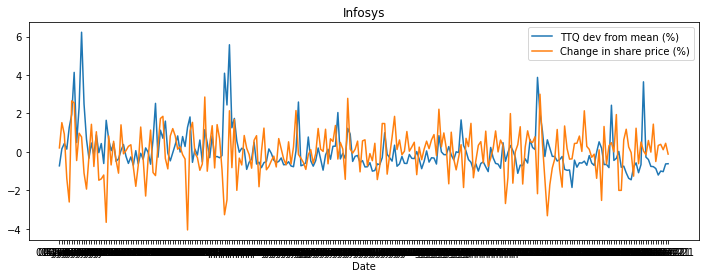

In [12]:
#Graphs

plt.rcParams["figure.figsize"] = (12,4)

plt.title('Infosys')
plt.plot(infy['Date'], infy['TTQ dev from mean (%)']/50)
plt.plot(infy['Date'], infy['Change in share price (%)'])
plt.legend(['TTQ dev from mean (%)','Change in share price (%)'])
plt.xlabel('Date')
plt.show()

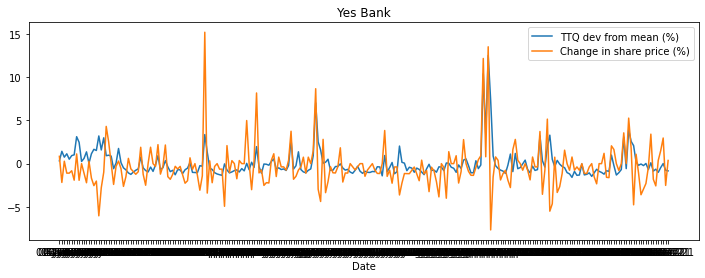

In [13]:
plt.plot(yes['Date'], yes['TTQ dev from mean (%)']/50)
plt.plot(yes['Date'], yes['Change in share price (%)'])
plt.legend(['TTQ dev from mean (%)','Change in share price (%)'])
plt.xlabel('Date')
plt.title('Yes Bank')
plt.show()

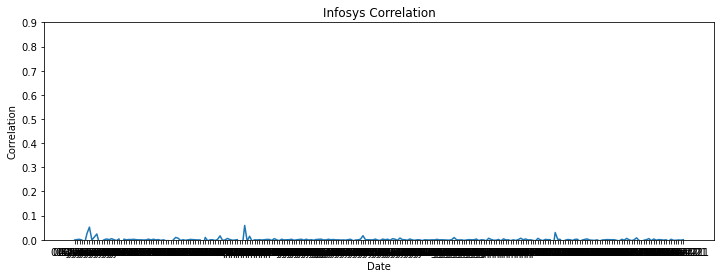

In [14]:
plt.plot(infy['Date'], infy['Correlation'])
plt.ylabel('Correlation')
plt.xlabel('Date')
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,0.9))
plt.title('Infosys Correlation')
plt.show()

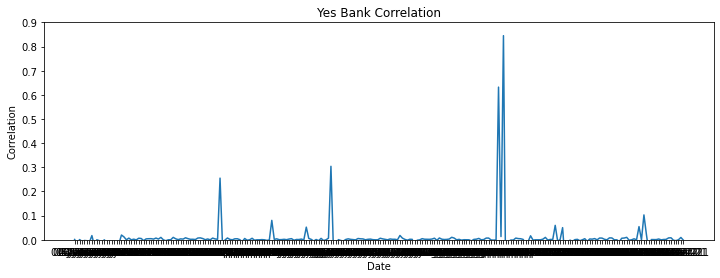

In [15]:
plt.plot(yes['Date'], yes['Correlation'])
plt.ylabel('Correlation')
plt.xlabel('Date')
plt.title('Yes Bank Correlation')
x1,x2,y1,y2 = plt.axis()  
plt.axis((x1,x2,0,0.9))
plt.show()
